In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/shalineraghupathy/Documents/Software Engineering/Software-Engineering/DublinBikes/Flask/DublinBikes/ml/input/weather.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
weather_data.head()


,number,weather_main,weather_description,weather_id,weather_icon,position_lat,position_long,temperature,feels_like,temp_min,...,last_update,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
0,1,Clouds,broken clouds,803,04n,53.344,-6.2672,279.58,277.69,278.51,...,2024-02-27 23:15:21,2,2016139,IE,2024-02-27 07:18:57,2024-02-27 17:57:13,0,2964574,Dublin,200
1,2,Clouds,scattered clouds,802,03n,53.344,-6.2672,279.39,276.21,278.51,...,2024-02-27 23:17:59,2,2016139,IE,2024-02-27 07:18:57,2024-02-27 17:57:13,0,2964574,Dublin,200
2,3,Clouds,scattered clouds,802,03n,53.344,-6.2672,279.34,276.15,277.58,...,2024-02-27 23:21:08,2,2016139,IE,2024-02-27 07:18:57,2024-02-27 17:57:13,0,2964574,Dublin,200
3,4,Clouds,broken clouds,803,04n,53.344,-6.2672,279.58,277.69,278.51,...,2024-02-27 23:15:21,2,2016139,IE,2024-02-27 07:18:57,2024-02-27 17:57:13,0,2964574,Dublin,200
4,5,Clouds,scattered clouds,802,03n,53.344,-6.2672,279.34,276.15,277.58,...,2024-02-27 23:21:08,2,2016139,IE,2024-02-27 07:18:57,2024-02-27 17:57:13,0,2964574,Dublin,200


The dataset contains weather information with various attributes, including weather conditions, temperature (and its feels-like counterpart), position (latitude and longitude), as well as system and location identifiers. It appears to have data relevant to Dublin, judging by the 'name' column.

summary of the steps we might take for cleaning, transforming, and visualizing this data:

#Cleaning:

Check for missing values and decide how to handle them (e.g., impute or drop).
Identify and correct any inconsistencies in data (e.g., outliers or incorrect values).

#Transformation:

Convert temperature from Kelvin to Celsius for more intuitive readings.
Parse dates and times from the 'last_update', 'sys_sunrise', and 'sys_sunset' columns for easier analysis.
Potentially create new columns that could be useful for analysis (e.g., day of the week, hour of the day).

#Visualization:

Temperature trends over time.
Distribution of weather conditions.
Correlation between temperature and feels-like temperature.

In [2]:
# Checking for missing values in the dataset
missing_values = weather_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = weather_data.duplicated().sum()

missing_values, duplicate_rows


(number                 0
 weather_main           0
 weather_description    0
 weather_id             0
 weather_icon           0
 position_lat           0
 position_long          0
 temperature            0
 feels_like             0
 temp_min               0
 temp_max               0
 pressure               0
 humidity               0
 visibility             0
 wind_speed             0
 wind_deg               0
 clouds_all             0
 last_update            0
 sys_type               0
 sys_id                 0
 sys_country            0
 sys_sunrise            0
 sys_sunset             0
 timezone               0
 id                     0
 name                   0
 cod                    0
 dtype: int64,
 0)

The dataset contains no missing values and no duplicate rows, which simplifies the initial cleaning process. 

Next: 

Converting temperatures from Kelvin to Celsius for readability.
Parsing date and time columns to proper datetime formats.


In [3]:
# Convert temperatures from Kelvin to Celsius
weather_data['temperature_c'] = weather_data['temperature'] - 273.15
weather_data['feels_like_c'] = weather_data['feels_like'] - 273.15
weather_data['temp_min_c'] = weather_data['temp_min'] - 273.15
weather_data['temp_max_c'] = weather_data['temp_max'] - 273.15

# Parse date and time columns to datetime format
weather_data['last_update'] = pd.to_datetime(weather_data['last_update'])
weather_data['sys_sunrise'] = pd.to_datetime(weather_data['sys_sunrise'])
weather_data['sys_sunset'] = pd.to_datetime(weather_data['sys_sunset'])

# Check the transformed data
weather_data[['temperature', 'temperature_c', 'feels_like', 'feels_like_c', 'last_update', 'sys_sunrise', 'sys_sunset']].head()


,temperature,temperature_c,feels_like,feels_like_c,last_update,sys_sunrise,sys_sunset
0,279.58,6.43,277.69,4.54,2024-02-27 23:15:21,2024-02-27 07:18:57,2024-02-27 17:57:13
1,279.39,6.24,276.21,3.06,2024-02-27 23:17:59,2024-02-27 07:18:57,2024-02-27 17:57:13
2,279.34,6.19,276.15,3.00,2024-02-27 23:21:08,2024-02-27 07:18:57,2024-02-27 17:57:13
3,279.58,6.43,277.69,4.54,2024-02-27 23:15:21,2024-02-27 07:18:57,2024-02-27 17:57:13
4,279.34,6.19,276.15,3.00,2024-02-27 23:21:08,2024-02-27 07:18:57,2024-02-27 17:57:13


We've converted the temperature readings from Kelvin to Celsius and parsed the date and time columns into proper datetime formats. With these adjustments, the dataset is now easier to work with and analyze.

For the visualization part,

Temperature Trends: We could plot the daily average temperature over time to observe any trends.
Weather Conditions: A pie chart or bar graph showing the distribution of different weather conditions (e.g., cloudy, rainy, sunny) could provide insights into the most common weather types.
Temperature vs. Feels Like: Comparing the actual temperature to the feels-like temperature could reveal interesting patterns about the climate.
Sunrise and Sunset Times: Visualizing how the times of sunrise and sunset change over the dataset's timeframe might offer seasonal insights.

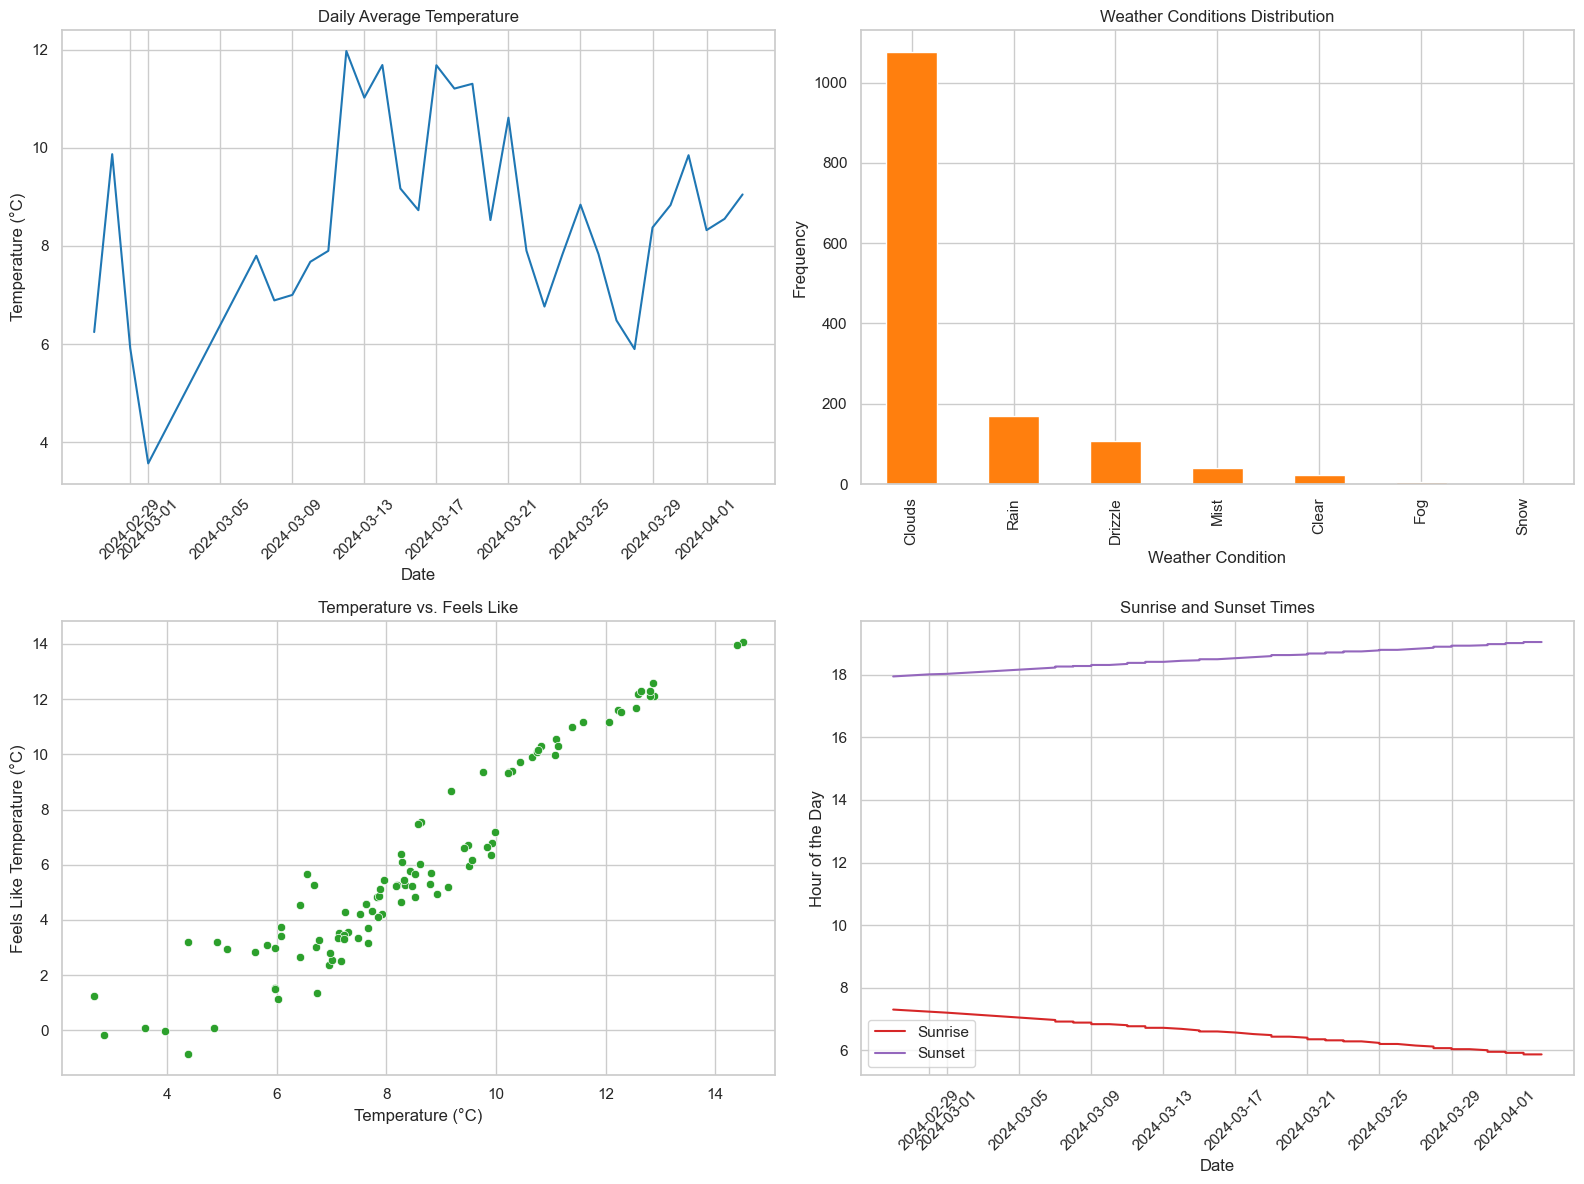

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Temperature Trends - Daily Average Temperature over time
weather_data['date'] = weather_data['last_update'].dt.date
daily_avg_temp = weather_data.groupby('date')['temperature_c'].mean().reset_index()

# Weather Conditions - Distribution
weather_conditions = weather_data['weather_main'].value_counts()

# Temperature vs. Feels Like
temp_feels_like = weather_data[['temperature_c', 'feels_like_c']].sample(100)  # Sample for a cleaner plot

# Sunrise and Sunset Times - Extract hour for visualization
weather_data['sunrise_hour'] = weather_data['sys_sunrise'].dt.hour + weather_data['sys_sunrise'].dt.minute / 60
weather_data['sunset_hour'] = weather_data['sys_sunset'].dt.hour + weather_data['sys_sunset'].dt.minute / 60
sun_times = weather_data[['date', 'sunrise_hour', 'sunset_hour']].drop_duplicates()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Temperature Trends
axs[0, 0].plot(daily_avg_temp['date'], daily_avg_temp['temperature_c'], color='tab:blue')
axs[0, 0].set_title('Daily Average Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Weather Conditions Distribution
weather_conditions.plot(kind='bar', ax=axs[0, 1], color='tab:orange')
axs[0, 1].set_title('Weather Conditions Distribution')
axs[0, 1].set_xlabel('Weather Condition')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Temperature vs. Feels Like
sns.scatterplot(x='temperature_c', y='feels_like_c', data=temp_feels_like, ax=axs[1, 0], color='tab:green')
axs[1, 0].set_title('Temperature vs. Feels Like')
axs[1, 0].set_xlabel('Temperature (°C)')
axs[1, 0].set_ylabel('Feels Like Temperature (°C)')

# Plot 4: Sunrise and Sunset Times
axs[1, 1].plot(sun_times['date'], sun_times['sunrise_hour'], label='Sunrise', color='tab:red')
axs[1, 1].plot(sun_times['date'], sun_times['sunset_hour'], label='Sunset', color='tab:purple')
axs[1, 1].set_title('Sunrise and Sunset Times')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Hour of the Day')
axs[1, 1].legend()
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Daily Average Temperature: This graph shows the trend of daily average temperatures over time. we can observe any fluctuations or patterns that may indicate seasonal changes or other weather phenomena.

Weather Conditions Distribution: The bar chart illustrates the frequency of different weather conditions observed. It highlights which weather conditions are most common.

Temperature vs. Feels Like: This scatter plot compares the actual temperature to the feels-like temperature for a sample of the data points. The relationship between these two variables can provide insights into how often the perceived temperature aligns with the actual temperature.

Sunrise and Sunset Times: This graph displays the hours of sunrise and sunset over time. It allows you to see how daylight hours change, potentially indicating different seasons or times of the year.